<a href="https://colab.research.google.com/github/j23-cs167/project-2-stella-depuydt/blob/main/New_Project2_Depuydt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Stella Depuydt

Proposed Points (out of 25): 23

Description/Writing	I think I deserve	
1: Problem	2/2		
2: Data Prep	2/2		
3: Research	10/10	
4: Analysis	8/10	
5: Bumps in the Road.	1/1	
Total	23/25

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

The data I'm using for this project came from one of the datasets recommended for project 1. It is the avocado dataset, and I decided to work with it because there are no strings in the dataframe, and hopefully there will be less issues with analyzing it. I also like guac.

**My research question for this project is to predict which variable most significntly predicts the total number of avocados sold.**

The target variable is Total number of avocados sold (Total volume). The predictor variables are title, authors, (isbn, isbn-13), language code, number of pages, ratings count, and text reviews count. Since the variables being analyzed are numerical (not categorical) variables, this is a regression problem.

Note:

4046 = small Hass (avocados)

4225 = large Hass (avocados)

4770 = extra large Hass (avocados)

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

After I loaded in my data, I checked for missing values (There weren't any). Then I removed the ID number since ID numbers starting at zero are automatically assigned. I also dropped date, type, and region. 

In [1]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


avocado_data = pd.read_csv('/content/drive/MyDrive/Datasets/avocado.csv')
avocado_data.head(20)



Mounted at /content/drive


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
avocado_data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
avocado_data.isna().any()




Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [6]:
avocado_data = avocado_data[['Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']]
avocado_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [32]:
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor




target= ['Total Volume']
predictors = ['AveragePrice', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year']
train_data, test_data, train_sln, test_sln = train_test_split(avocado_data[predictors], avocado_data[target])
train_data.head()

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
17348,1.35,74.88,74.94,0.00,5039.69,5039.69,0.00,0.00,2017
9931,1.54,3459.78,64726.47,0.00,18101.82,6963.33,11138.49,0.00,2015
13059,1.51,4463.69,6588.39,0.00,2176.85,786.59,1390.26,0.00,2016
709,1.11,177872.77,42422.72,48825.24,91797.23,87986.35,1880.03,1930.85,2015
11340,1.54,15942.89,8626.08,0.00,12.49,12.49,0.00,0.00,2015


In [10]:
print(avocado_data.dtypes)

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized



array([[-0.14437643, -0.23231155, -0.24452897, ..., -0.21997092,
        -0.17329379,  0.89825016],
       [ 0.3260491 , -0.22961212, -0.19002002, ..., -0.17444958,
        -0.17329379, -1.22442128],
       [ 0.25177139, -0.22881151, -0.23903735, ..., -0.21428913,
        -0.17329379, -0.16308556],
       ...,
       [ 0.30128986, -0.23203747, -0.24452962, ..., -0.21997092,
        -0.17329379, -1.22442128],
       [-0.46624653, -0.23186368, -0.23573716, ..., -0.08509514,
        -0.17329379,  0.89825016],
       [-0.39196881, -0.22995895, -0.15985026, ..., -0.15962629,
        -0.16889184, -1.22442128]])

# 3. Research

Put your code and your experiments here.

In [34]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
# build and test a baseline model here
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


dummy_reg = DummyRegressor(strategy='mean') #make random guesses
dummy_reg.fit(train_data, train_sln)
preds = dummy_reg.predict(test_data)


print('MSE: ', metrics.mean_squared_error(test_sln, preds))

MSE:  12356366441384.111


In [35]:
#Non-Normaized kNN
neigh = neighbors.KNeighborsRegressor(weights='uniform')
neigh.fit(train_data, train_sln)
predictions = neigh.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

MSE:  25149139459.059788


In [36]:
#Normaized kNN
neigh = neighbors.KNeighborsRegressor(weights='uniform')
neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

MSE:  66701186393.14055


In [40]:
#Normalized kNN with a Parameter tuned
neigh = neighbors.KNeighborsRegressor(n_neighbors=4, weights='uniform')
neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

MSE:  57389282473.024124


In [37]:
#Non-Normaized w-kNN
neigh = neighbors.KNeighborsRegressor(weights='distance')
neigh.fit(train_data, train_sln)
predictions = neigh.predict(test_data)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

MSE:  20353326537.1649


In [38]:
#Normaized w-kNN
neigh = neighbors.KNeighborsRegressor(weights='distance')
neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

MSE:  59210720113.465866


In [41]:
#Normalized w-kNN with a Parameter tuned
neigh = neighbors.KNeighborsRegressor(n_neighbors=9, weights='distance')
neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

MSE:  69042955608.95657


In [42]:
#Non-Normaized decision tree
dtr = tree.DecisionTreeRegressor()
dtr.fit(train_data, train_sln)
dtr_preds = dtr.predict(test_data)

print('MSE: ', metrics.mean_squared_error(dtr_preds,test_sln))

MSE:  62311268822.947105


In [43]:
#Normaized decision tree
ndtr = tree.DecisionTreeRegressor()
ndtr.fit(train_data_normalized, train_sln)
ndtr_preds = dtr.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(ndtr_preds,test_sln))

MSE:  13121625088137.414


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [44]:
#Normalized Decision tree with a parameter tuned
smol_dtr = tree.DecisionTreeRegressor(max_depth=3)
smol_dtr.fit(train_data_normalized, train_sln)
predictions = smol_dtr.predict(test_data_normalized)


print('MSE: ', metrics.mean_squared_error(predictions,test_sln))

MSE:  309281958098.283


In [45]:
#Non-Normaized random forest
forest = RandomForestRegressor()

forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

<ipython-input-45-8b440a429397>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data,train_sln)


MSE:  34127233254.606762


In [46]:
#Normaized random forest
forest = RandomForestRegressor()

forest.fit(train_data_normalized,train_sln)
predictions = forest.predict(test_data_normalized)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

<ipython-input-46-d8cfa9d953a1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data_normalized,train_sln)


MSE:  30820626524.174755


In [47]:
#Normalized Random forest with a parameter tuned

forest = RandomForestRegressor(n_estimators=37)


forest.fit(train_data_normalized,train_sln)
predictions = forest.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))

<ipython-input-47-3f2d2ace5efa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data_normalized,train_sln)


MSE:  35472326203.02484


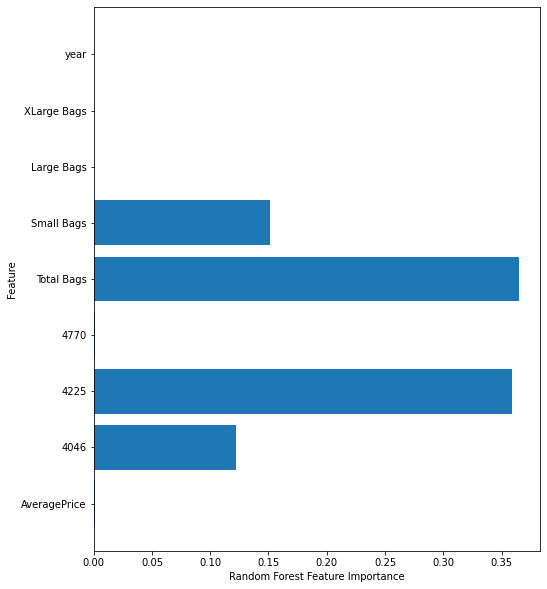

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()



#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Dummy Regressor MSE:  12356366441384.111


| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |25149139459.059788 |66701186393.14055|69042955608.95657    |
| w-kNN   |20353326537.1649|69042955608.95657|69042955608.95657|
| decision tree |62311268822.947105|13121625088137.414|309281958098.283|
|random forest|34127233254.606762|30820626524.174755|35472326203.02484|

The feature importance chart is the most useful tool in answering the research question posed at the begining of the project. My research question for this project was to predict which variable most significntly predicts the total number of avocados sold. The feature importance chart shows that totla bags sold and number of medium avoados are the biggest predictors of total number of avocados sold. I am surprised that price per avocado didn't play a larger role. In fact, the feature importance chart claims that it plays no role in the number of avocados sold.

I thought it was interesting that MSEs for all models were incredibly high. The lowest MSE belonged to the non-normalized weighted k nearest neighbrs algorithm. The worst in this series of modes was the normalized decision tree. This was an even higher (worse) MSE than the MSE rom the dummy regressor. This means that that particular model was less efficiant than randomly guessing. 
The third worst after those two as the normalized decision tree with the parameter tuned. The Res of the MSEs were relatively similar with 11 numbers before the decimal. One message that can clearly be taken from this data is that normalizing the decision trees are counterproductive and degrade the quality of the model.

It is hard to draw more definitive conclusions from this set of models besides the answer to the primary research question. In future projects, I would explore different possibilities for the target variable. I is also possible that this dataset is simply not suited for these types of machine learning models.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

When I was trying to normlize the data, I had trouble with needing to convert string data to float. I used this website to try to fix the issue, but I couldn't figure it out, so I'm going to switch to the avocado dataset because all the values there are numbers and I will hopefully not run into this issue.
https://www.statology.org/pandas-could-not-convert-string-to-float/ 

Update: I ran into the issue, so I am just going to drop all the columns that are giving me this issue in the name of the greater good and getting this project done! Hopefully this won't skew my results too much.

Unfortunately none of my MSEs are anywhere near 0. However, since it's so late, I'm just going to stick with it.

I think I messed up something with this dataset, and although I did my best with it, the results I got aren't very interpretable. I think I made a mistake somewhere, but I'm not sure where or how to fix it. Maybe I picked the wrong varible as my target.